# Import necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

#### Import the cleaned data set

In [2]:
df = pd.read_csv(r'C:\Users\richa\OneDrive\Desktop\d207\churn_clean.csv')

#####Rename survey response columns with names that better describes their attributes

In [3]:
df.rename(columns = {'Item1':'Timely_response', 'Item2':'Timely_fixes', 
                     'Item3':'Timely_replacements', 'Item4':'Reliability', 
                      'Item5':'options', 'Item6':'Respectful_response',
                     'Item7':'Courteous_exchange', 'Item8':'Active_listening'}, inplace=True)
print(df)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West B

########## ANALYZE CHURN AND ACTIVE LISTENING

Create Contingency table for Churn and Active Listening

In [4]:
contingency = pd.crosstab(df['Churn'], df['Active_listening'])
contingency

Active_listening,1,2,3,4,5,6,7,8
Churn,,,,,,,,
No,150,1012,2557,2501,974,145,10,1
Yes,56,366,904,899,361,60,4,0


In [5]:
contingency_pct = pd.crosstab(df['Churn'], df['Active_listening'], normalize='index')
contingency_pct

Active_listening,1,2,3,4,5,6,7,8
Churn,,,,,,,,
No,0.020408,0.137687,0.347891,0.340272,0.132517,0.019728,0.001361,0.000136
Yes,0.021132,0.138113,0.341132,0.339245,0.136226,0.022642,0.001509,0.000000


<Axes: xlabel='Active_listening', ylabel='Churn'>

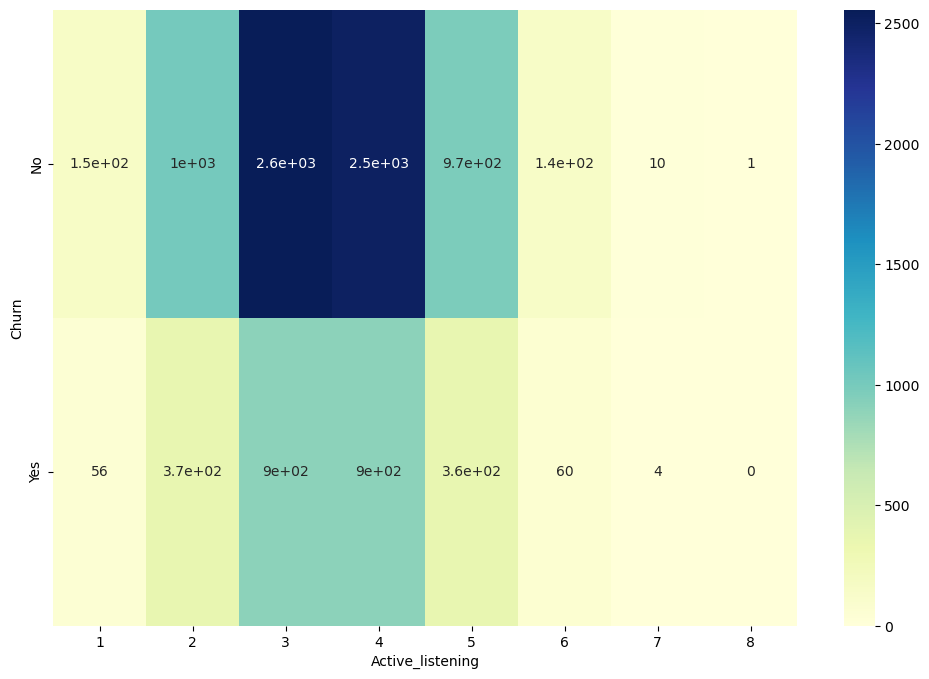

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

####### Chi-square test of independence

In [7]:
c, p, dof, expected = chi2_contingency(contingency)
print('p-value = ' + str(p))

p-value = 0.9739656420068161


UNIVARIATE STATISTICS

VISUALIZING CONTINUOUS VARIABLES

We create Seaborn boxplots for the continuous variables

<Axes: xlabel='MonthlyCharge'>

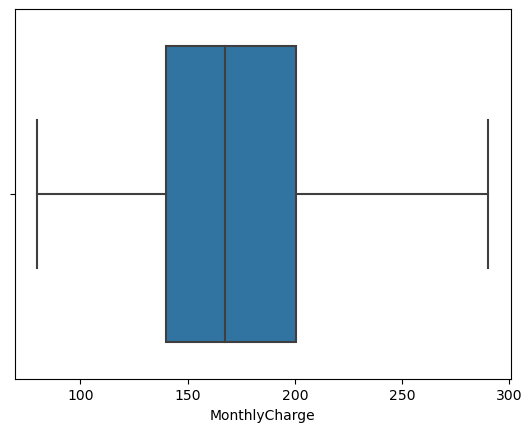

In [8]:
sns.boxplot(x=df['MonthlyCharge'])

<Axes: xlabel='Bandwidth_GB_Year'>

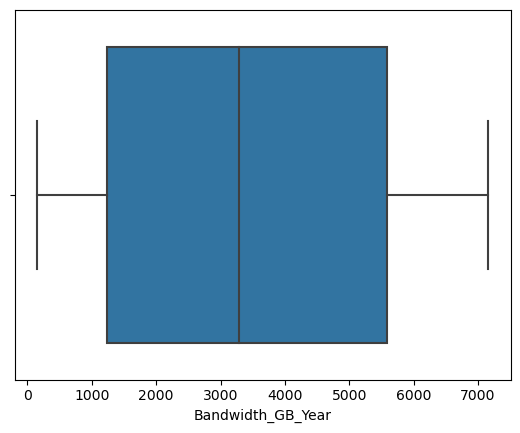

In [9]:
sns.boxplot(x=df['Bandwidth_GB_Year'])

We generate SCATTER PLOT for MonthlyCharge

Since for data set is too large for a scatter plot, we randomly generated a sample data of size 100 for the original data set

In [10]:
import random
datasample = df.head(100)
print(datasample)

    CaseOrder Customer_id                           Interaction  \
0           1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2           3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3           4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4           5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
..        ...         ...                                   ...   
95         96     W877056  728fccac-151c-4743-8c4a-ebf5af17ec9d   
96         97     M478246  fb749668-dbf8-448a-bc59-5bdba08f7e0b   
97         98     N417817  832e769e-3b90-47cc-8f70-12e77fbd52a2   
98         99     R180138  7def992e-acd6-4b3e-9d01-68812f5fd2ff   
99        100     N931384  d280a01b-3e7a-4303-b8b1-62ca5f99597c   

                                 UID          City State  \
0   e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1   f2de8bef964785f41a2959829830fb8a   West Branch    MI   
2   f1784cfa9f6

We generated Scatter plot for MonthlyCharge

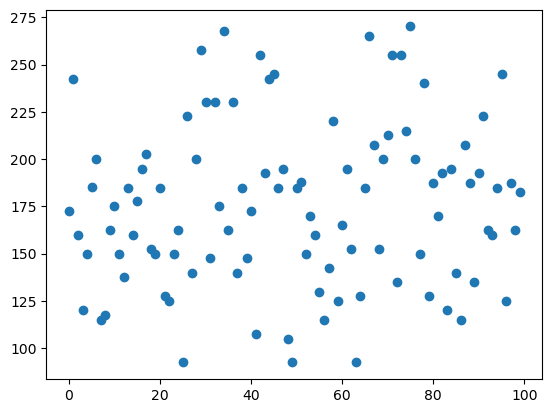

In [11]:
plt.scatter(datasample.index, datasample['MonthlyCharge'])
plt.show()

We generated Scatter plot for Bandwidth_GB_Year

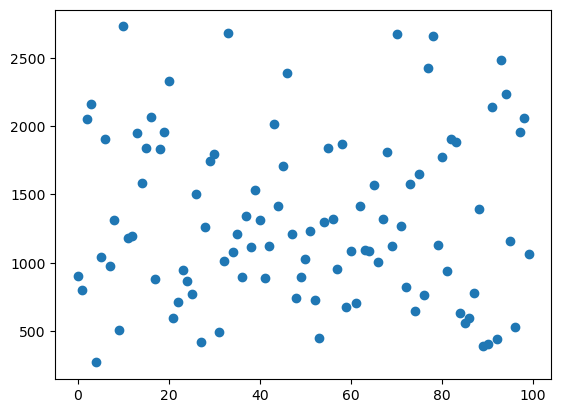

In [12]:
plt.scatter(datasample.index, datasample['Bandwidth_GB_Year'])
plt.show()

We generate histogram for MonthlyCharge

(array([ 5., 12.,  8., 20.,  8., 20.,  9.,  6.,  5.,  7.]),
 array([ 92.455141 , 110.2256688, 127.9961966, 145.7667244, 163.5372522,
        181.30778  , 199.0783078, 216.8488356, 234.6193634, 252.3898912,
        270.160419 ]),
 <BarContainer object of 10 artists>)

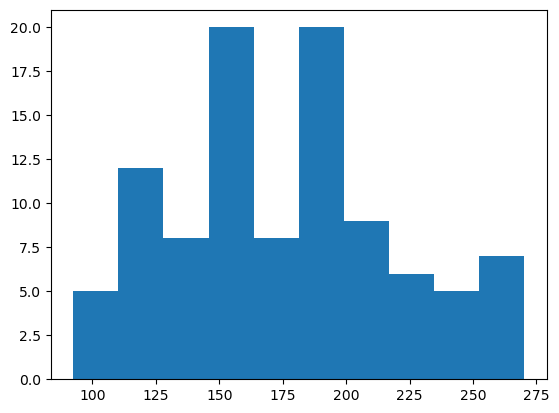

In [13]:
plt.hist(datasample['MonthlyCharge'])

We generate histogram for Bandwidth_GB_Year

(array([ 8., 11., 16., 18., 11.,  8., 13.,  7.,  4.,  4.]),
 array([ 271.4934362 ,  517.22087948,  762.94832276, 1008.67576604,
        1254.40320932, 1500.1306526 , 1745.85809588, 1991.58553916,
        2237.31298244, 2483.04042572, 2728.767869  ]),
 <BarContainer object of 10 artists>)

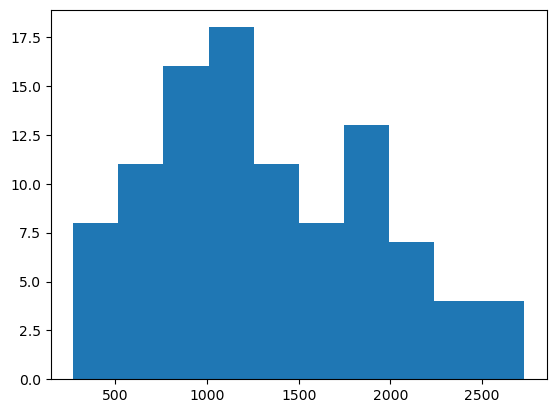

In [14]:
plt.hist(datasample['Bandwidth_GB_Year'])

VISUALIZING CATEGORICAL VARIABLES

Generating BAR CHARTS FOR Timely_response AND Active_listening

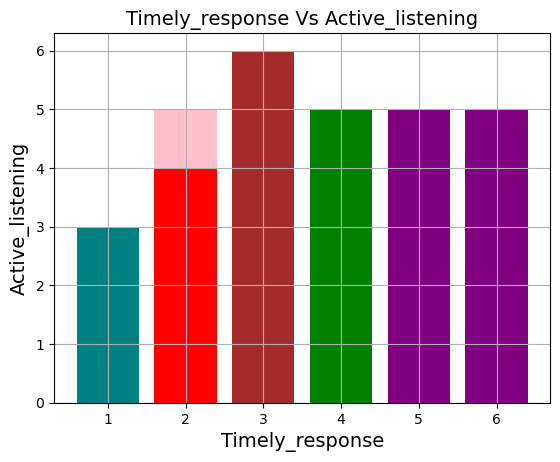

In [15]:
datasample = df.head(100)

Df = pd.DataFrame(datasample)

colors = ['green','blue','purple','brown','teal', 'red', 'yellow', 'pink']
plt.bar(Df['Timely_response'], Df['Active_listening'], color=colors)
plt.title('Timely_response Vs Active_listening', fontsize=14)
plt.xlabel('Timely_response', fontsize=14)
plt.ylabel('Active_listening', fontsize=14)
plt.grid(True)
plt.show()

BIVARIATE STATISTICS

# Create dataframe for heatmap bivariate analysis of correlation

In [16]:
df_bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Courteous_exchange', 'Active_listening']]

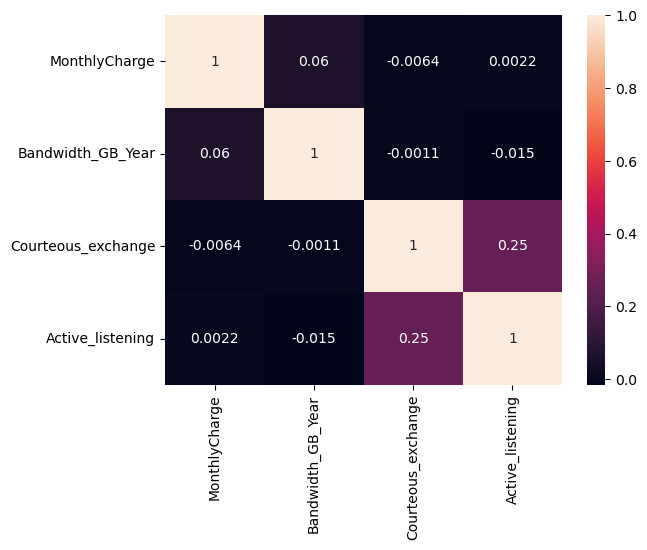

In [17]:
sns.heatmap(df_bivariate.corr(), annot=True)
plt.show()

Create a scatter plot of continuous variables MonthlyCharge & Bandwidth_GB_Year

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

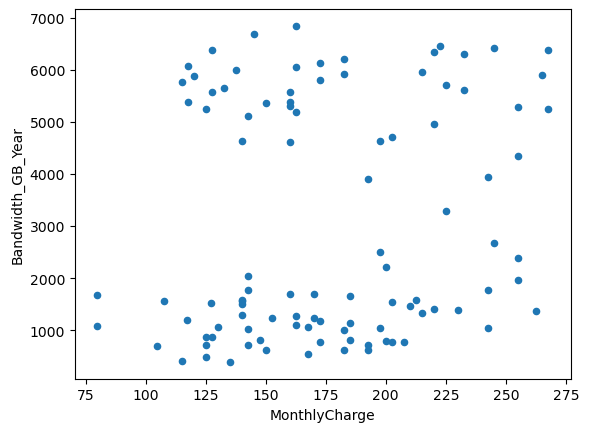

In [18]:
df_bivariate[df_bivariate['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', y='Bandwidth_GB_Year')

Create a scatter plot of categorical variables Courteous_exchange & Active_listening

<Axes: xlabel='Courteous_exchange', ylabel='Active_listening'>

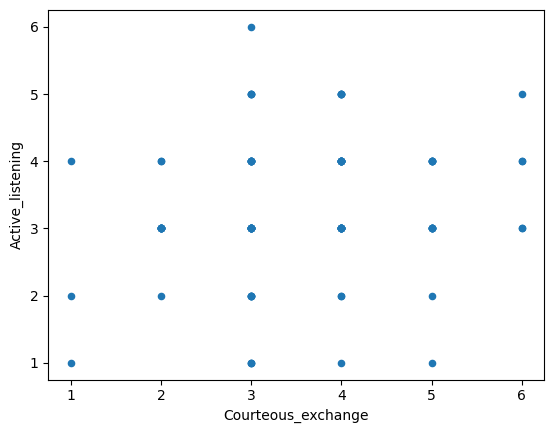

In [19]:
df_bivariate[df_bivariate['Courteous_exchange'] < 7].sample(100).plot.scatter(x='Courteous_exchange', y='Active_listening')

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

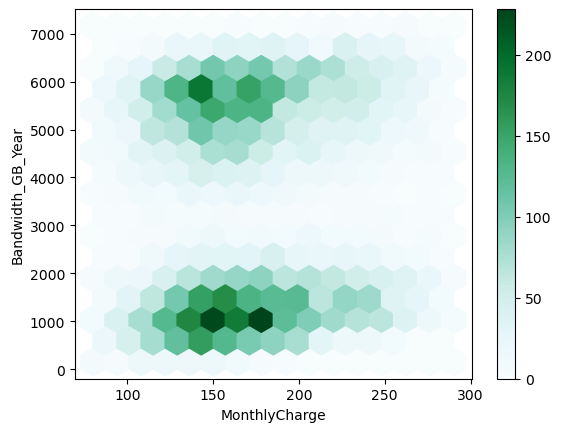

In [21]:
df_bivariate[df_bivariate['MonthlyCharge'] < 300].plot.hexbin(x='MonthlyCharge', y='Bandwidth_GB_Year', gridsize=15)

In [22]:
colors = ['blue', 'yellow']
df_bivariate[df_bivariate['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', y='Bandwidth_GB_Year'), color = colors)

SyntaxError: unmatched ')' (2543258019.py, line 2)